<a href="https://colab.research.google.com/github/rosiealice/global_pft_scripts/blob/master/daily_LAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install netCDF4

In [2]:

!pip install cftime

In [3]:
!pip install  nc-time-axis

In [4]:
import cftime
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4  # noqa: F401
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [5]:
#!/usr/bin/env python
from __future__ import print_function
import requests
import xml.etree.ElementTree as ET
import numpy

# Author: Unknown
# I got the original version from a word document published by ESGF
# https://docs.google.com/document/d/1pxz1Kd3JHfFp8vR2JCVBfApbsHmbUQQstifhGNdc6U0/edit?usp=sharing

# API AT: https://github.com/ESGF/esgf.github.io/wiki/ESGF_Search_REST_API#results-pagination

def esgf_search(server="https://esgf-node.llnl.gov/esg-search/search",
                files_type="OPENDAP", local_node=True, project="CMIP6",
                verbose=False, format="application%2Fsolr%2Bjson",
                use_csrf=False, **search):
    client = requests.session()
    payload = search
    payload["project"] = project
    payload["type"]= "File"
    if local_node:
        payload["distrib"] = "false"
    if use_csrf:
        client.get(server)
        if 'csrftoken' in client.cookies:
            # Django 1.6 and up
            csrftoken = client.cookies['csrftoken']
        else:
            # older versions
            csrftoken = client.cookies['csrf']
        payload["csrfmiddlewaretoken"] = csrftoken

    payload["format"] = format

    offset = 0
    numFound = 10000
    all_files = []
    files_type = files_type.upper()
    while offset < numFound:
        payload["offset"] = offset
        url_keys = [] 
        for k in payload:
            url_keys += ["{}={}".format(k, payload[k])]

        url = "{}/?{}".format(server, "&".join(url_keys))
        print(url)
        r = client.get(url)
        r.raise_for_status()
        resp = r.json()["response"]
        numFound = int(resp["numFound"])
        resp = resp["docs"]
        offset += len(resp)
        for d in resp:
            if verbose:
                for k in d:
                    print("{}: {}".format(k,d[k]))
            url = d["url"]
            for f in d["url"]:
                sp = f.split("|")
                if sp[-1] == files_type:
                    all_files.append(sp[0].split(".html")[0])
    return sorted(all_files)

In [48]:
result_all= esgf_search(activity_id='CMIP',  variable_id='lai',experiment_id='historical',frequency="day")
result_all

https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&experiment_id=historical&frequency=day&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&experiment_id=historical&frequency=day&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=10
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&experiment_id=historical&frequency=day&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=20
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&experiment_id=historical&frequency=day&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=30
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&experiment_id=historical&frequency=day&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=40
https:

['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r10i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-CM6-1_historical_r10i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r1i1p1f2/Eday/lai/gr/v20180917/lai_Eday_CNRM-CM6-1_historical_r1i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r2i1p1f2/Eday/lai/gr/v20181126/lai_Eday_CNRM-CM6-1_historical_r2i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r3i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-CM6-1_historical_r3i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-CM6-1/historical/r4i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-CM6-1_historical_r4i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/

In [18]:
result_cesm = esgf_search(activity_id='CMIP',  variable_id='lai', institution_id="NCAR",experiment_id='historical',frequency="day", source_id="CESM2")

https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&institution_id=NCAR&experiment_id=historical&frequency=day&source_id=CESM2&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0


In [19]:
result_cnrm = esgf_search(activity_id='CMIP',  variable_id='lai', institution_id="CNRM-CERFACS",frequency="day",experiment_id='historical', source_id="CNRM-ESM2-1")


https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&institution_id=CNRM-CERFACS&frequency=day&experiment_id=historical&source_id=CNRM-ESM2-1&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0


['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r1i1p1f2/Eday/lai/gr/v20181206/lai_Eday_CNRM-ESM2-1_historical_r1i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r2i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-ESM2-1_historical_r2i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r3i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-ESM2-1_historical_r3i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r4i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-ESM2-1_historical_r4i1p1f2_gr_18500101-20141231.nc',
 'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1/historical/r5i1p1f2/Eday/lai/gr/v20190125/lai_Eday_CNRM-ESM2-1_historical_r5i1p1f2_gr_18500101-20141231.nc',
 'http://esgf-data1.llnl.gov/t

In [64]:
result_ipsl = esgf_search(activity_id='CMIP',  variable_id='lai', frequency="day",experiment_id='historical', source_id="IPSL-CM6A-LR")

https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=IPSL-CM6A-LR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=IPSL-CM6A-LR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=10
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=IPSL-CM6A-LR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=20
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=IPSL-CM6A-LR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=30


In [67]:
result_mpi = esgf_search(activity_id='CMIP',  variable_id='lai', frequency="day",experiment_id='historical', source_id="MPI-ESM1-2-HR" )

https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MPI-ESM1-2-HR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MPI-ESM1-2-HR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=10
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MPI-ESM1-2-HR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=20
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MPI-ESM1-2-HR&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=30
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=hi

['https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Eday/lai/gn/v20190710/lai_Eday_MPI-ESM1-2-HR_historical_r3i1p1f1_gn_19800101-19841231.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Eday/lai/gn/v20190710/lai_Eday_MPI-ESM1-2-HR_historical_r3i1p1f1_gn_19850101-19891231.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Eday/lai/gn/v20190710/lai_Eday_MPI-ESM1-2-HR_historical_r3i1p1f1_gn_19900101-19941231.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Eday/lai/gn/v20190710/lai_Eday_MPI-ESM1-2-HR_historical_r3i1p1f1_gn_19950101-19991231.nc',
 'https://esgf-data1.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r3i1p1f1/Eday/lai/gn/v20190710/lai_Eday_MPI-ESM1-2-HR_historical_r3i1p1f1_gn_20000101-20041231.nc',
 'https://esgf-

In [78]:
result_miroc = esgf_search(activity_id='CMIP',  variable_id='lai', frequency="day",experiment_id='historical', source_id="MIROC-ES2L", member_id="r5i1p1f2")
result_miroc[-7:]

https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MIROC-ES2L&member_id=r5i1p1f2&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MIROC-ES2L&member_id=r5i1p1f2&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=10
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MIROC-ES2L&member_id=r5i1p1f2&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=20
https://esgf-node.llnl.gov/esg-search/search/?activity_id=CMIP&variable_id=lai&frequency=day&experiment_id=historical&source_id=MIROC-ES2L&member_id=r5i1p1f2&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=30
https://esgf-node.llnl.gov/esg-search/search/

['http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20080101-20081231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20090101-20091231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20100101-20101231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20110101-20111231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20120101-20121231.nc',
 'http://esgf-data2.diasjp.net

In [82]:
result_miroc[-3:]

['http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20120101-20121231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20130101-20131231.nc',
 'http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC-ES2L/historical/r5i1p1f2/Eday/lai/gn/v20200318/lai_Eday_MIROC-ES2L_historical_r5i1p1f2_gn_20140101-20141231.nc']

['http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r9i1p1f1/Eday/lai/gr/v20180803/lai_Eday_IPSL-CM6A-LR_historical_r9i1p1f1_gr_18500101-20141231.nc']

In [20]:
files_to_open = result_cesm[-4:]
ds_cesm = xr.open_mfdataset(files_to_open, combine='by_coords',use_cftime=None)

/usr/local/lib/python3.6/dist-packages/xarray/conventions.py:494: SerializationWarning: variable 'lai' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


In [38]:
files_cnrm=result_cnrm[-1:]
ds_cnrm = xr.open_mfdataset(files_cnrm, combine='by_coords',use_cftime=None)

In [62]:
files_ipsl=result_ipsl[-1:]
ds_ipsl = xr.open_mfdataset(files_ipsl, combine='by_coords',use_cftime=None)

In [71]:
files_mpi=result_mpi[-7:]
ds_mpi = xr.open_mfdataset(files_mpi, combine='by_coords',use_cftime=None)

In [81]:
files_miroc=result_miroc[-3:]
ds_miroc = xr.open_mfdataset(files_miroc, combine='by_coords',use_cftime=None)

In [8]:
#t=ds.time[10]
#ds.lai.sel(time=t,lon=slice(2, 50),lat=slice(-20, 0)).squeeze().plot()
##ds.tas.sel(time='1950-01').squeeze().plot()

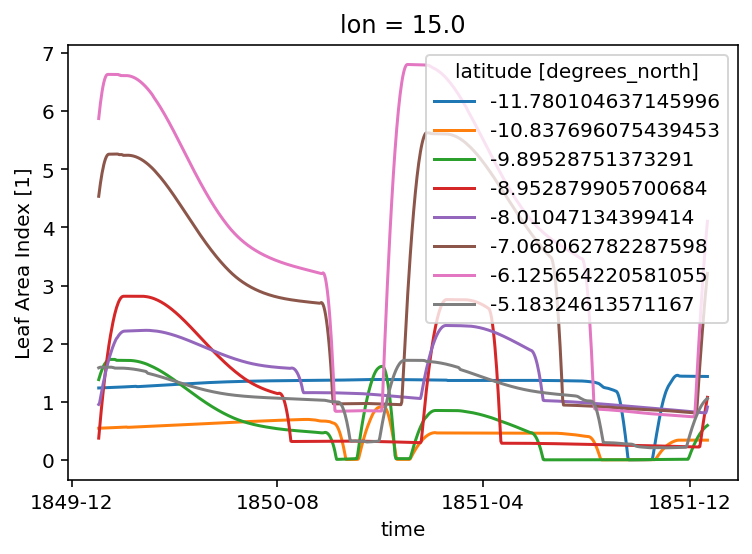

In [9]:
tmin=ds_cesm.time[1]
tmax=ds_cesm.time[720]
ts=ds_cesm.lai.sel(time=slice(tmin,tmax), lon=slice(15,16),lat=slice(-12, -5)).squeeze()
ts.plot.line(x="time")

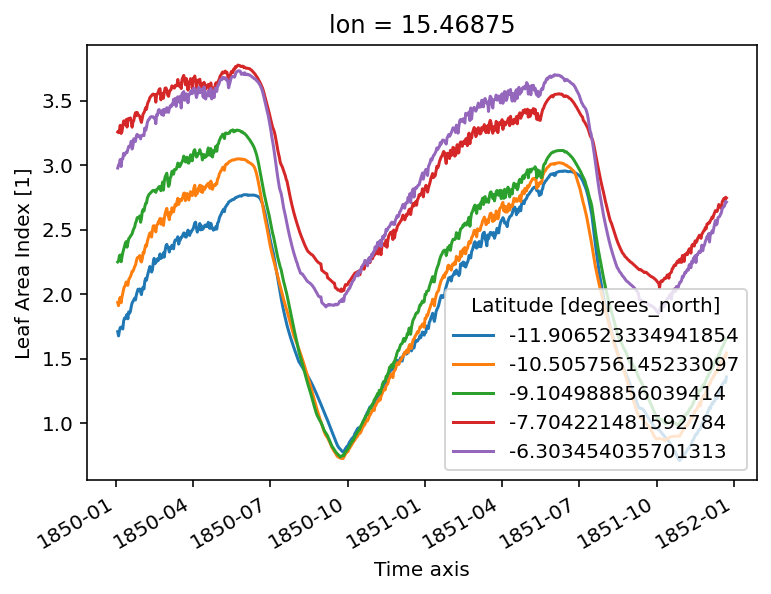

In [44]:
tmin=ds_cnrm.time[1]
tmax=ds_cnrm.time[720]
ts=ds_cnrm.lai.sel(time=slice(tmin,tmax), lon=slice(15,16),lat=slice(-12, -5)).squeeze()
ts.plot.line(x="time")


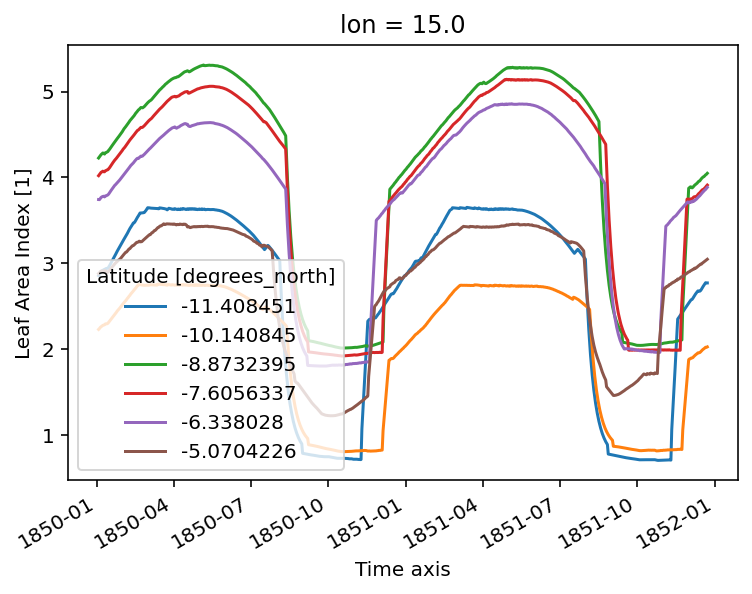

In [63]:
tmin=ds_ipsl.time[1]
tmax=ds_ipsl.time[720]
ts=ds_ipsl.lai.sel(time=slice(tmin,tmax), lon=slice(15,16),lat=slice(-12, -5)).squeeze()
ts.plot.line(x="time")

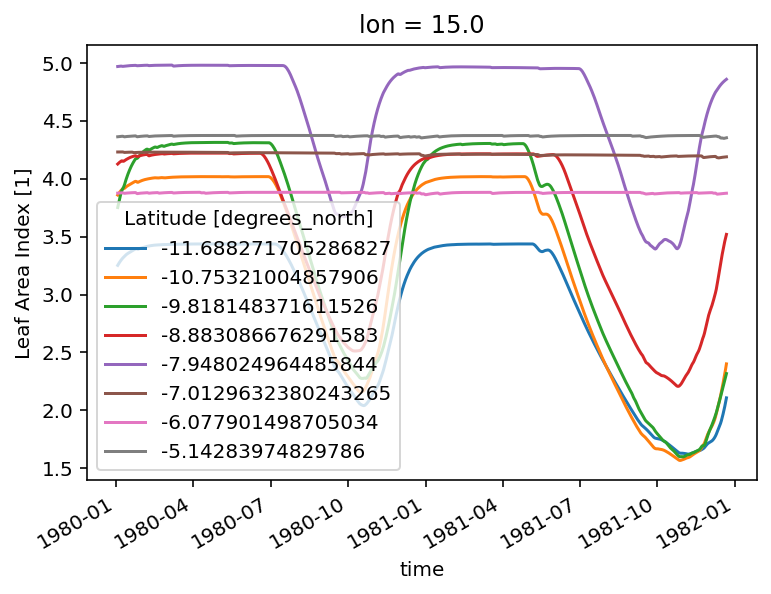

In [75]:
tmin=ds_mpi.time[1]
tmax=ds_mpi.time[720]
ts=ds_mpi.lai.sel(time=slice(tmin,tmax), lon=slice(15,15.5),lat=slice(-12, -5)).squeeze()
ts.plot.line(x="time")

<xarray.DataArray 'lai' (time: 720, lat: 2)>
dask.array<getitem, shape=(720, 2), dtype=float32, chunksize=(365, 2), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -9.767 -6.977
    lon      float64 16.88
  * time     (time) datetime64[ns] 2012-01-02T12:00:00 ... 2013-12-21T12:00:00
Attributes:
    standard_name:   leaf_area_index
    long_name:       Leaf Area Index
    comment:         A ratio obtained by dividing the total upper leaf surfac...
    units:           1
    original_name:   LLAI
    original_units:  m2 m-2
    history:         2020-01-02T05:04:45Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where land time: mean
    cell_measures:   area: areacella
    _ChunkSizes:     [  1  64 128]


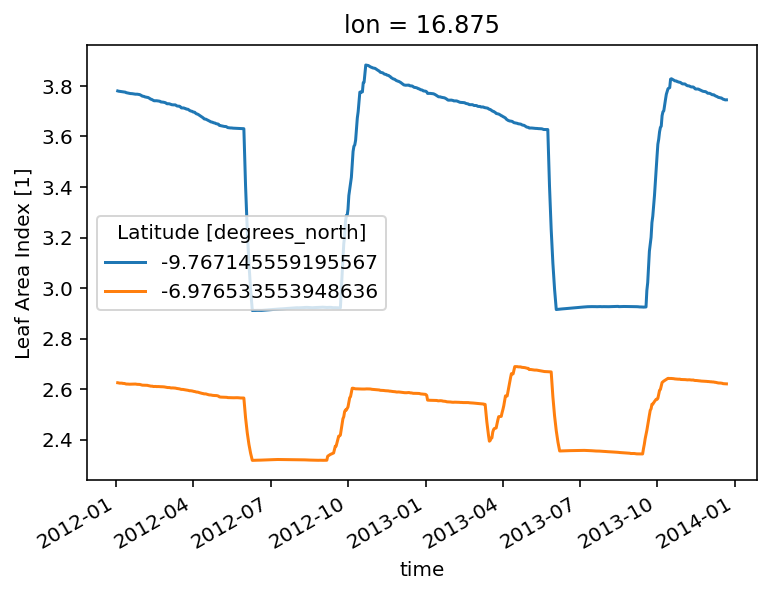

In [88]:
tmin=ds_miroc.time[1]
tmax=ds_miroc.time[720]
ts=ds_miroc.lai.sel(time=slice(tmin,tmax), lon=slice(15,17),lat=slice(-12, -5)).squeeze()
print(ts)
ts.plot.line(x="time")

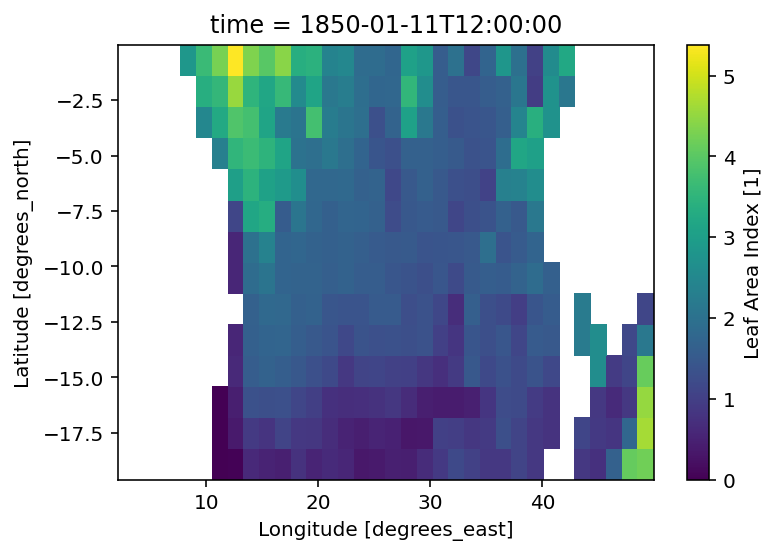

In [41]:
t=ds_cnrm.time[10]
ds_cnrm.lai.sel(time=t,lon=slice(2, 50),lat=slice(-20, 0)).squeeze().plot()
#ds.tas.sel(time='1950-01').squeeze().plot()